In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movierating/movieRating.csv


In [2]:
# 匯入必要的套件
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dot, Add, Dense
from keras.optimizers import Adam
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [3]:
# 讀取資料
file_path = "/kaggle/input/movierating/movieRating.csv"
movie_data = pd.read_csv(file_path)


In [4]:
# 隨機打散並分割資料
train_data, test_data = train_test_split(movie_data, test_size=0.2, random_state=42, shuffle=True)

# 映射 UserID 和 MovieID 到索引
user_ids = movie_data['UserID'].unique()
movie_ids = movie_data['MovieID'].unique()

user_to_index = {user_id: idx for idx, user_id in enumerate(user_ids)}
movie_to_index = {movie_id: idx for idx, movie_id in enumerate(movie_ids)}

In [5]:
# 新增索引欄位
train_data['UserIndex'] = train_data['UserID'].map(user_to_index)
train_data['MovieIndex'] = train_data['MovieID'].map(movie_to_index)
test_data['UserIndex'] = test_data['UserID'].map(user_to_index)
test_data['MovieIndex'] = test_data['MovieID'].map(movie_to_index)

In [6]:
# 新增索引欄位
train_data['UserIndex'] = train_data['UserID'].map(user_to_index)
train_data['MovieIndex'] = train_data['MovieID'].map(movie_to_index)
test_data['UserIndex'] = test_data['UserID'].map(user_to_index)
test_data['MovieIndex'] = test_data['MovieID'].map(movie_to_index)


In [7]:
# 定義矩陣分解模型
n_users = len(user_ids)
n_movies = len(movie_ids)
embedding_size = 100  # 增加嵌入維度

user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_embedding = Embedding(input_dim=n_users, output_dim=embedding_size, embeddings_regularizer=l2(1e-6))(user_input)
movie_embedding = Embedding(input_dim=n_movies, output_dim=embedding_size, embeddings_regularizer=l2(1e-6))(movie_input)

user_vec = Flatten()(user_embedding)
movie_vec = Flatten()(movie_embedding)

In [8]:
# 加入偏置項
user_bias = Embedding(input_dim=n_users, output_dim=1)(user_input)
movie_bias = Embedding(input_dim=n_movies, output_dim=1)(movie_input)

user_bias = Flatten()(user_bias)
movie_bias = Flatten()(movie_bias)


In [9]:
# 預測
dot_product = Dot(axes=1)([user_vec, movie_vec])
prediction = Add()([dot_product, user_bias, movie_bias])

# 建立模型
model = Model(inputs=[user_input, movie_input], outputs=prediction)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [10]:
# 準備資料
X_train = [train_data['UserIndex'].values, train_data['MovieIndex'].values]
y_train = train_data['Rating'].values

X_test = [test_data['UserIndex'].values, test_data['MovieIndex'].values]
y_test = test_data['Rating'].values

# 訓練模型
history = model.fit(X_train, y_train, epochs=10, batch_size=256, verbose=1, validation_split=0.1)


Epoch 1/10


I0000 00:00:1733392437.495772      65 service.cc:145] XLA service 0x7d89d0005f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733392437.495834      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 121/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 13.9705

I0000 00:00:1733392438.465720      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2531/2531 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.4721 - val_loss: 0.9395
Epoch 2/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.8919 - val_loss: 0.8582
Epoch 3/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7984 - val_loss: 0.8279
Epoch 4/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7293 - val_loss: 0.8133
Epoch 5/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6582 - val_loss: 0.8124
Epoch 6/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5798 - val_loss: 0.8178
Epoch 7/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.5027 - val_loss: 0.8448
Epoch 8/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.4300 - val_loss: 0.8777
Epoch 9/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3695 - val_loss: 0.9114
Epoch 10/10
2531/2531 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3239 - val_loss: 0.9475


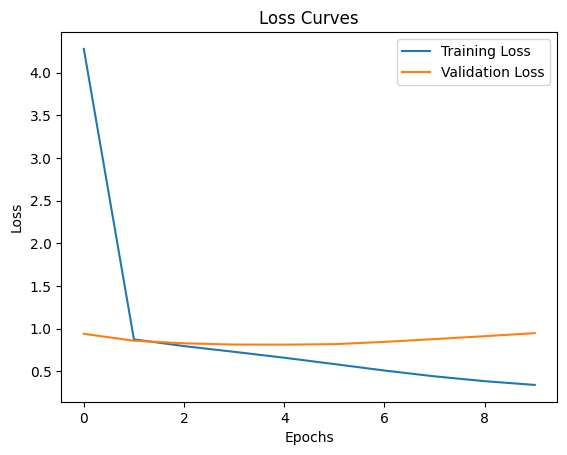

5625/5625 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Mean Absolute Error (MAE): 0.7377314942174776


In [11]:
# 繪製訓練和驗證損失曲線
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 預測與計算 MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")